# **Chapter 04:**
Data Cleaning and Preparation with Pandas

---



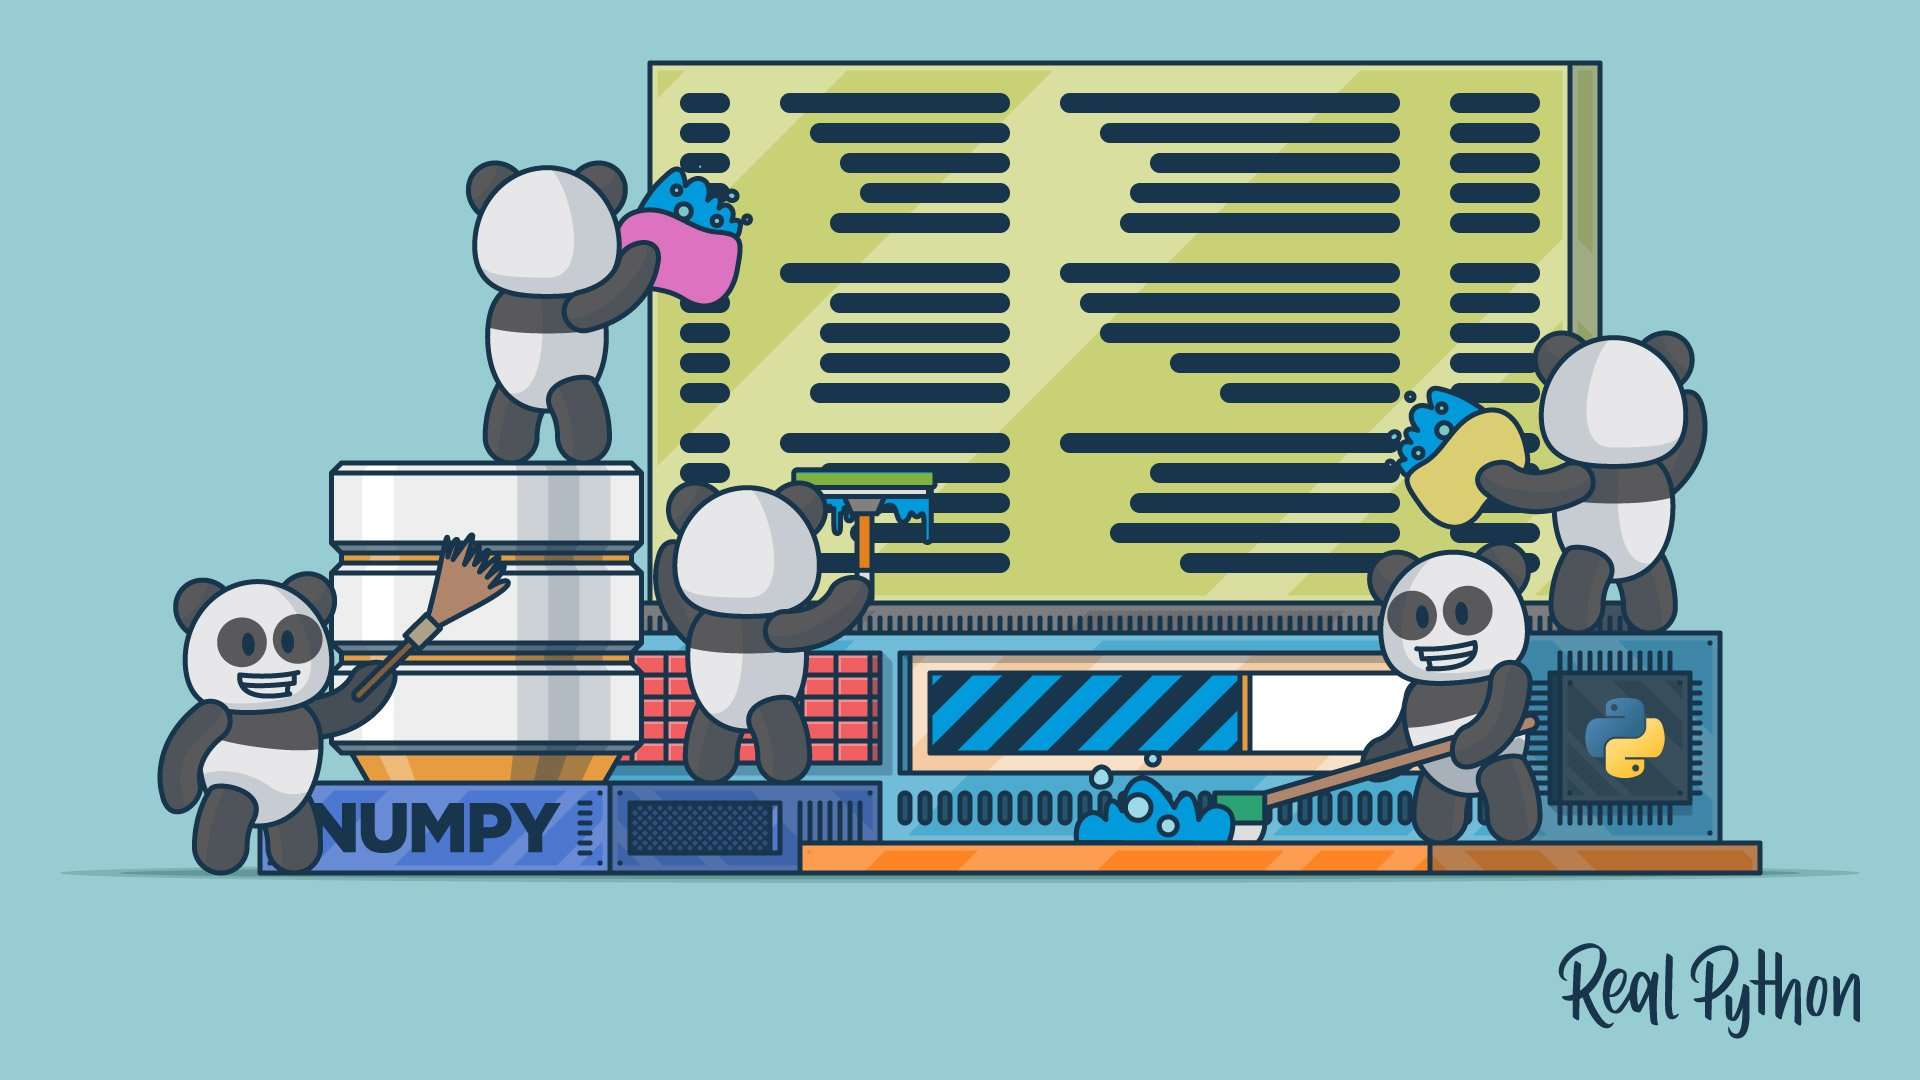

### What to look for?
* Missing Data
* Duplicated Data
* Outliers
* Type issues
* Inconsistant Data (eg : "Apple", "apple", "APPLE")
* Invalid Data (eg: “date of birth: male”, “address: -1234”)


### Setup

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
cd /content/drive/MyDrive/DataAnalysis-with-Python

/content/drive/MyDrive/DataAnalysis-with-Python


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('titanic.csv')

## **LECTURE 01:** *Handling Missing Data*


### None: Pythonic missing data

* type object
* can't perform mathematical operations
* very expensive

In [ ]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [ ]:
vals1.sum()

TypeError: ignored

### NaN: Missing numerical data

In [ ]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

In [ ]:
1 + np.nan

nan

In [ ]:
0 *  np.nan

nan

In [ ]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [ ]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

### NaN and None with Pandas

In [ ]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [ ]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [ ]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

### Operations

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed
- ``replace()``: Replace a string, regex, list, dictionary, series, number etc. from a dataframe.
- ``interpolate()``: Uses various interpolation technique to fill the missing values

isnull()

In [ ]:
data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
data.Age.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

notnull()

In [ ]:
data.Age.notnull()

0       True
1       True
2       True
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: Age, Length: 891, dtype: bool

In [ ]:
data.Age[data.Age.notnull()]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

### Inconsistent null values

In [ ]:
df = pd.DataFrame({"A":[12, 4, 5, None, 1],
                   "B":["#NA", 2, 54, 3, "na"],
                   "C":[20, 16, "not applicable", 3, "n/a"],
                   "D":[14, 3, np.nan, None, 6],
                   "E":["N/A", 13, 0, 9, "N/a"],
                   "F":[34, 14, 23, 1, 7]})
df.to_csv("clean_me.csv")

In [ ]:
df = pd.read_csv("clean_me.csv", index_col=[0])
df.head()

,A,B,C,D,E,F
0,12.0,NaN,20,14.0,NaN,34
1,4.0,2,16,3.0,13,14
2,5.0,54,not applicable,NaN,0,23
3,NaN,3,3,NaN,9,1
4,1.0,na,NaN,6.0,N/a,7


In [ ]:
df.isnull().sum()

A    1
B    1
C    1
D    2
E    1
F    0
dtype: int64

In [ ]:
df = pd.read_csv("clean_me.csv", index_col=[0], na_values = ["N/a", "not applicable", "na"])
df.head()

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,NaN,NaN,0.0,23
3,NaN,3.0,3.0,NaN,9.0,1
4,1.0,NaN,NaN,6.0,NaN,7


In [ ]:
df.isnull().sum()

A    1
B    2
C    2
D    2
E    2
F    0
dtype: int64

## **LECTURE 02:** *Visualizing Missing Data*


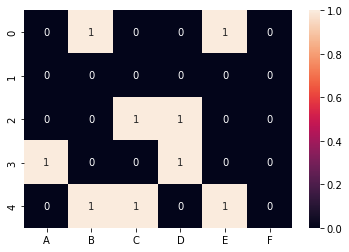

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, annot=True)

In [ ]:
import missingno as msno

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


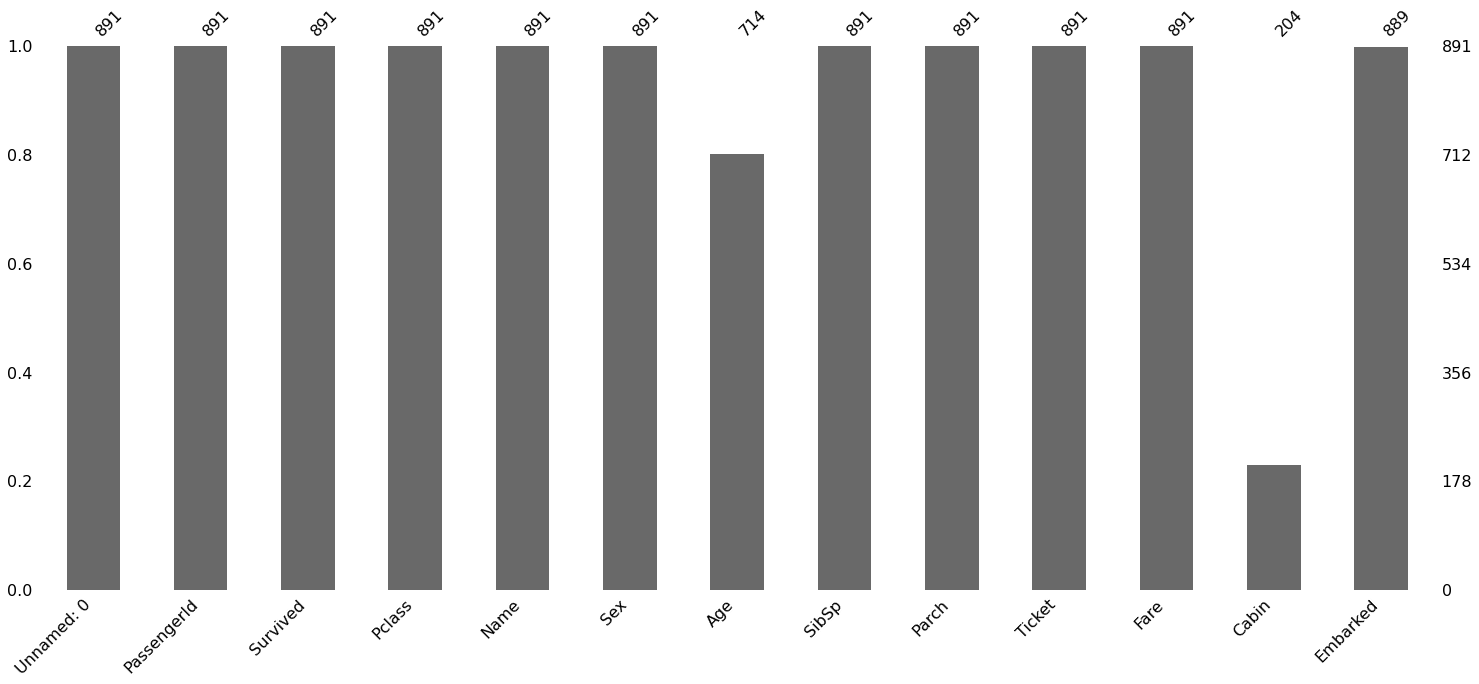

In [ ]:
msno.bar(data)

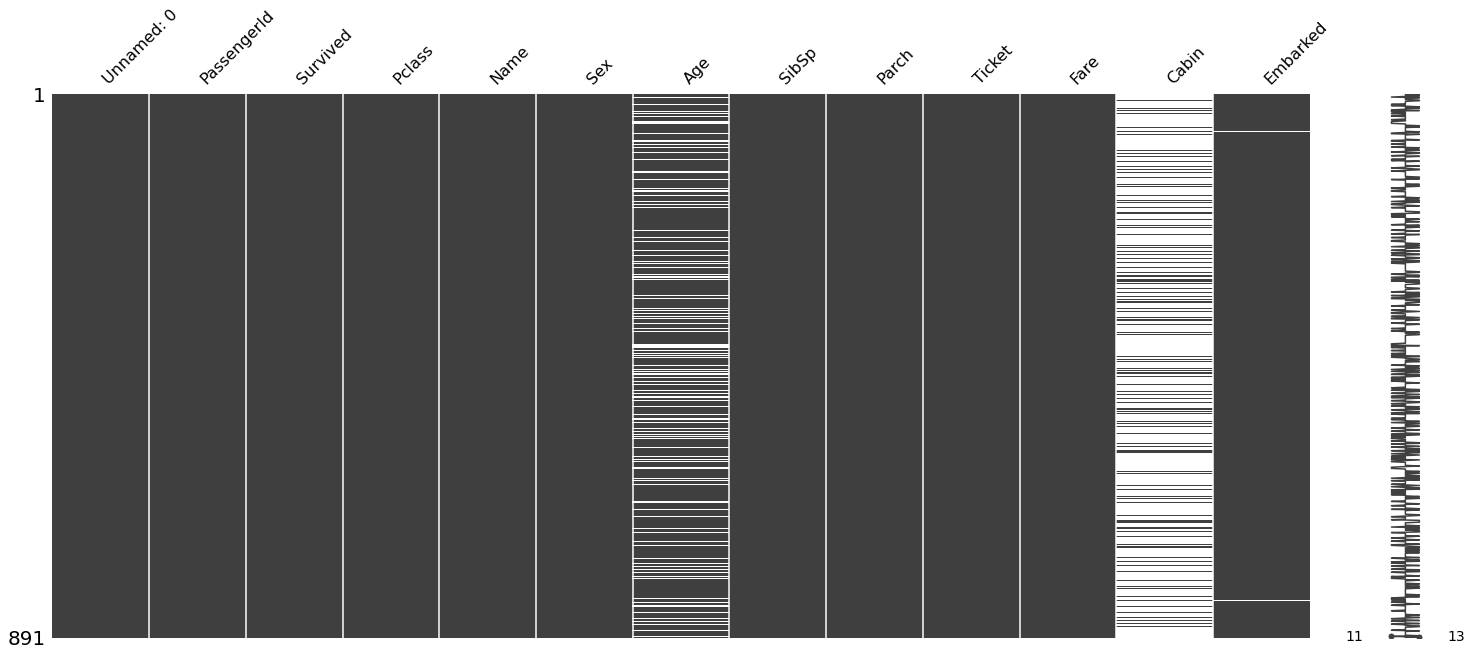

In [ ]:
# Gives positional information of the missing values
msno.matrix(data)

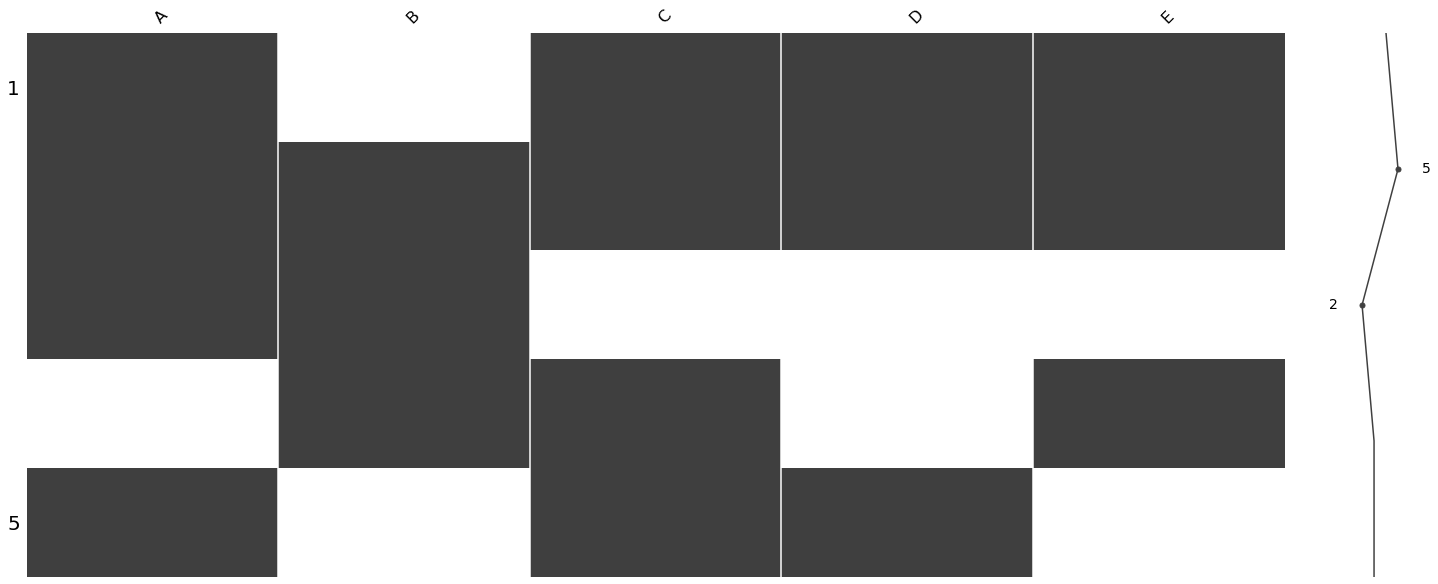

In [ ]:
msno.matrix(df)

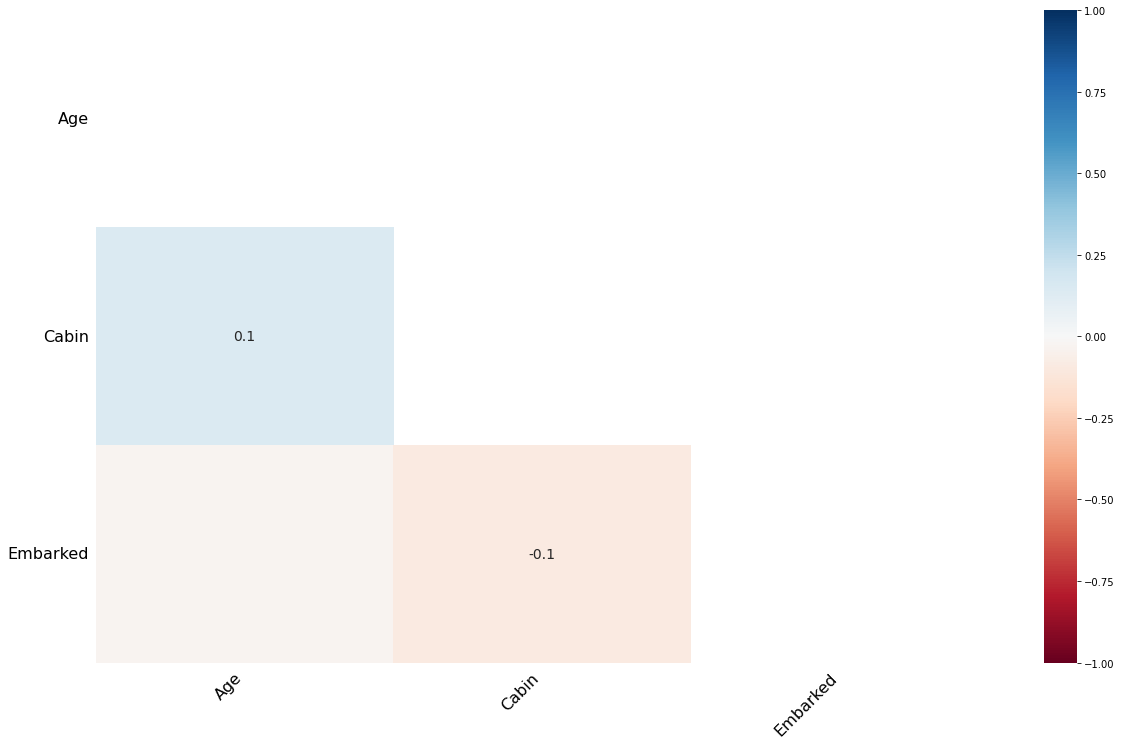

In [ ]:
# Gives a heatmap of how missing values are related
msno.heatmap(data)

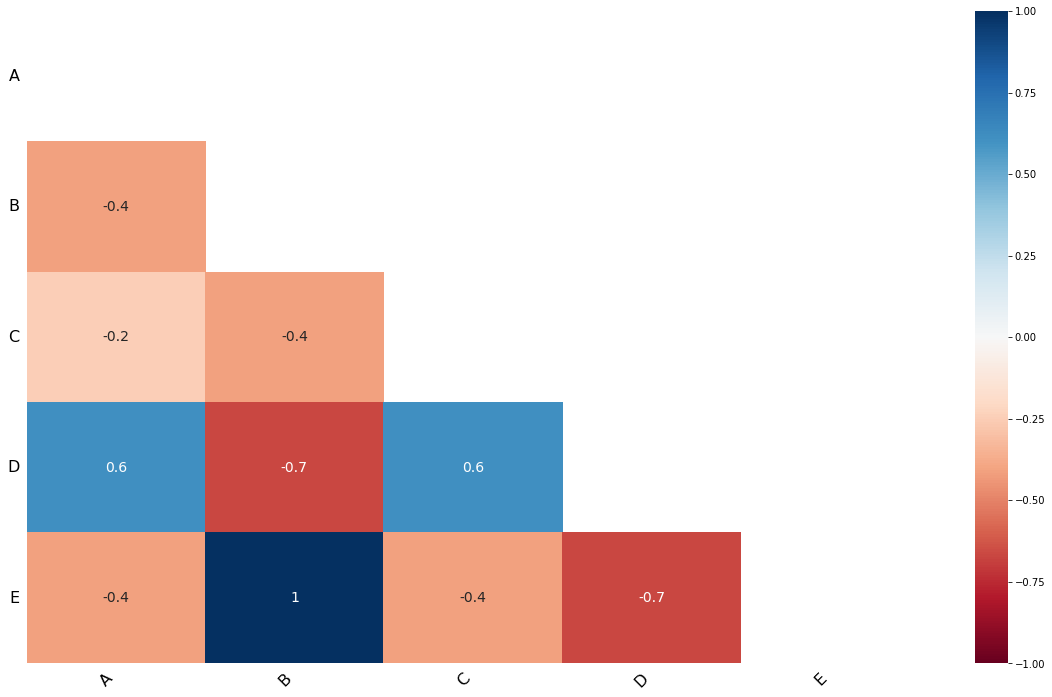

In [ ]:
msno.heatmap(df)

In [ ]:
df.head()

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,NaN,NaN,0.0,23
3,NaN,3.0,3.0,NaN,9.0,1
4,1.0,NaN,NaN,6.0,NaN,7


In [ ]:
# isnull().sum() will sum the number of missing values by columns
data_count_of_missval_by_col = (data.isnull().sum())
display(data_count_of_missval_by_col)

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# below code will display only the columns with missing values (in absolute number of rows)
display(data_count_of_missval_by_col[data_count_of_missval_by_col > 0])


Age         177
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# below code will display only the columns with missing values (in percentage of missing values to the total rows)
(data_count_of_missval_by_col[data_count_of_missval_by_col > 0]/data.shape[0])*100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

## **LECTURE 03:** *Deleting Missing Data*

before dropping, ask yourself. Are you dropping an important data/class?

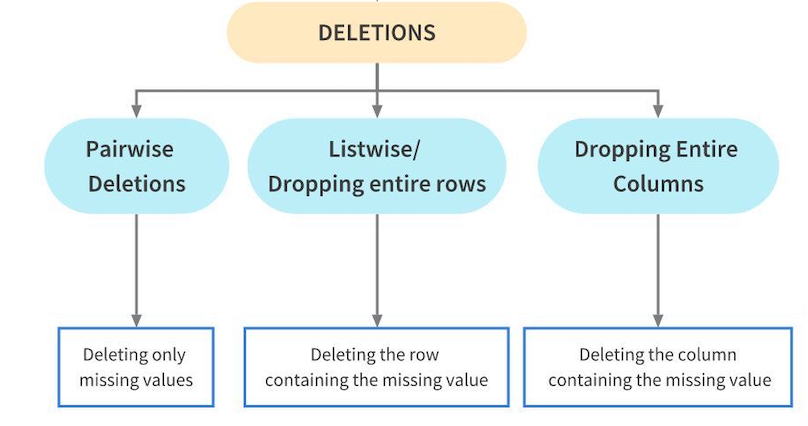

### Pairwise Deletion

In [ ]:
df.head()

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,NaN,NaN,0.0,23
3,NaN,3.0,3.0,NaN,9.0,1
4,1.0,NaN,NaN,6.0,NaN,7


In [ ]:
df.sum()

A    22.0
B    59.0
C    39.0
D    23.0
E    22.0
F    79.0
dtype: float64

In [ ]:
titanic_1 = data.copy()
titanic_1['Age'].mean() #pandas skips the missing values and calculates mean of the remaining values.

29.69911764705882

### Listwise Deletion/ Dropping rows

In [ ]:
df.dropna()

,A,B,C,D,E
1,4.0,2.0,16.0,3.0,13.0


In [ ]:
df

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,NaN,NaN,0.0,23
3,NaN,3.0,3.0,NaN,9.0,1
4,1.0,NaN,NaN,6.0,NaN,7


In [ ]:
df.dropna(subset=['B'])

,A,B,C,D,E
1,4.0,2.0,16.0,3.0,13.0
2,5.0,54.0,NaN,NaN,0.0
3,NaN,3.0,3.0,NaN,9.0


In [ ]:
df.dropna(axis='rows', thresh=4) # non-null values > 4 -> dont delete

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,NaN,NaN,0.0,23
3,NaN,3.0,3.0,NaN,9.0,1


### Dropping complete columns

In [ ]:
df.dropna(axis='columns')

,F
0,34
1,14
2,23
3,1
4,7


In [ ]:
df

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,NaN,NaN,0.0,23
3,NaN,3.0,3.0,NaN,9.0,1
4,1.0,NaN,NaN,6.0,NaN,7


In [ ]:
df.dropna(subset=['D', 'C'], how='all')

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
3,NaN,3.0,3.0,NaN,9.0,1
4,1.0,NaN,NaN,6.0,NaN,7


In [ ]:
df.dropna(axis=1, how='all')

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,NaN,NaN,0.0,23
3,NaN,3.0,3.0,NaN,9.0,1
4,1.0,NaN,NaN,6.0,NaN,7


drop if a column have less then 4 non-null values

In [ ]:
df.dropna(axis='columns', thresh=4)

,A,F
0,12.0,34
1,4.0,14
2,5.0,23
3,NaN,1
4,1.0,7


drop if a column has less then 80% of non-null values  
    OR  
drop if a column has only 20% of non-null values

In [ ]:
df.shape[0] x 80 / 100 = df.shape[0] x 0.8

5

In [ ]:
df.dropna(axis=1, thresh = int(0.8*df.shape[0])) # thresh = 4

,A,F
0,12.0,34
1,4.0,14
2,5.0,23
3,NaN,1
4,1.0,7


In [ ]:
df.dropna(axis=1, thresh = 4)

,A,F
0,12.0,34
1,4.0,14
2,5.0,23
3,NaN,1
4,1.0,7


## **LECTURE 04:** *Imputation Data*

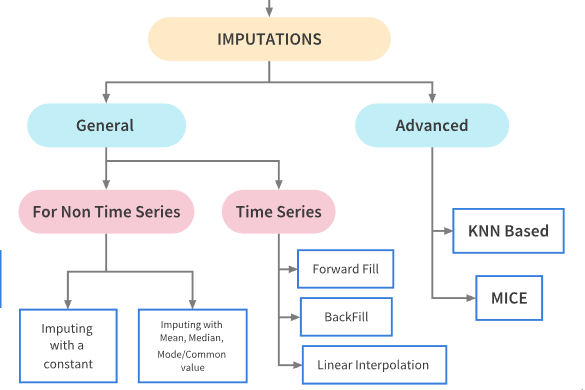

### Using fillna

In [ ]:
data.Age.fillna(23)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    23.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
data.Age.fillna(data.Age.mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [ ]:
data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
data.Age.fillna(method='ffill')

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    19.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
data.Age.fillna(method='bfill')

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    26.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### Using replace()

In [ ]:
df.replace(to_replace = np.nan, value = -99) 

,A,B,C,D,E,F
0,12.0,-99.0,20.0,14.0,-99.0,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,-99.0,-99.0,0.0,23
3,-99.0,3.0,3.0,-99.0,9.0,1
4,1.0,-99.0,-99.0,6.0,-99.0,7


In [ ]:
df.replace(to_replace = 0, value = np.nan) 

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,NaN,NaN,NaN,23
3,NaN,3.0,3.0,NaN,9.0,1
4,1.0,NaN,NaN,6.0,NaN,7


### Using Interpolate()
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

In [ ]:
df

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,NaN,NaN,0.0,23
3,NaN,3.0,3.0,NaN,9.0,1
4,1.0,NaN,NaN,6.0,NaN,7


In [ ]:
df.interpolate(method ='linear')

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,9.5,4.0,0.0,23
3,3.0,3.0,3.0,5.0,9.0,1
4,1.0,3.0,3.0,6.0,9.0,7


In [ ]:
df.interpolate(method ='linear', limit_direction ='forward')

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,9.5,4.0,0.0,23
3,3.0,3.0,3.0,5.0,9.0,1
4,1.0,3.0,3.0,6.0,9.0,7


In [ ]:
df.interpolate(method ='linear', limit_direction ='both')

,A,B,C,D,E,F
0,12.0,2.0,20.0,14.0,13.0,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,9.5,4.0,0.0,23
3,3.0,3.0,3.0,5.0,9.0,1
4,1.0,3.0,3.0,6.0,9.0,7


In [ ]:
df.interpolate?

In [ ]:
df.interpolate(method ='linear', limit_direction ='forward', limit = 1)

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,9.5,4.0,0.0,23
3,3.0,3.0,3.0,NaN,9.0,1
4,1.0,3.0,3.0,6.0,9.0,7


### Using Simple Imputer

In [ ]:
df

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,NaN,NaN,0.0,23
3,NaN,3.0,3.0,NaN,9.0,1
4,1.0,NaN,NaN,6.0,NaN,7


In [ ]:
# imputing with a constant
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

from sklearn.impute import SimpleImputer

df2 = df.copy()
imputer = SimpleImputer(strategy='constant') # imputing using constant value

df2.iloc[:,:] = imputer.fit_transform(df2)
# 
df2.isnull().sum()

A    0
B    0
C    0
D    0
E    0
F    0
dtype: int64

In [ ]:
df2

,A,B,C,D,E,F
0,12.0,0.0,20.0,14.0,0.0,34.0
1,4.0,2.0,16.0,3.0,13.0,14.0
2,5.0,54.0,0.0,0.0,0.0,23.0
3,0.0,3.0,3.0,0.0,9.0,1.0
4,1.0,0.0,0.0,6.0,0.0,7.0


In [ ]:
imputer = SimpleImputer(strategy='constant', fill_value=1)
imputer.fit_transform(df)

array([[12.,  1., 20., 14.,  1., 34.],
       [ 4.,  2., 16.,  3., 13., 14.],
       [ 5., 54.,  1.,  1.,  0., 23.],
       [ 1.,  3.,  3.,  1.,  9.,  1.],
       [ 1.,  1.,  1.,  6.,  1.,  7.]])

In [ ]:
imputer = SimpleImputer(strategy='constant', fill_value=1,  add_indicator=True)
imputer.fit_transform(df)

array([[12.,  1., 20., 14.,  1., 34.,  0.,  1.,  0.,  0.,  1.],
       [ 4.,  2., 16.,  3., 13., 14.,  0.,  0.,  0.,  0.,  0.],
       [ 5., 54.,  1.,  1.,  0., 23.,  0.,  0.,  1.,  1.,  0.],
       [ 1.,  3.,  3.,  1.,  9.,  1.,  1.,  0.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  6.,  1.,  7.,  0.,  1.,  1.,  0.,  1.]])

If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data.

In [ ]:
imputer = SimpleImputer(strategy='most_frequent', add_indicator=True) # can also be mean/ median
imputer.fit_transform(df)

array([[12.,  2., 20., 14.,  0., 34.,  0.,  1.,  0.,  0.,  1.],
       [ 4.,  2., 16.,  3., 13., 14.,  0.,  0.,  0.,  0.,  0.],
       [ 5., 54.,  3.,  3.,  0., 23.,  0.,  0.,  1.,  1.,  0.],
       [ 1.,  3.,  3.,  3.,  9.,  1.,  1.,  0.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.,  0.,  7.,  0.,  1.,  1.,  0.,  1.]])

### Imputing with strategy

In [ ]:
mean_ages = data.groupby(['Sex','Pclass'])['Age'].mean()

def remove_na_ages(row):
    '''
    function to check if the age is null and replace wth the mean from 
    the mean ages dataframe 
    '''
    if pd.isnull(row['Age']): #female - 1
        return mean_ages[row['Sex'],row['Pclass']]
    else:
        return row['Age']

In [ ]:
data['Age_new2'] = data.apply(remove_na_ages, axis=1)

## **LECTURE 05:** *Removing duplicate values*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
data.Cabin.duplicated()

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

In [ ]:
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
data[data.duplicated(subset=['Survived', 'Pclass', 'Sex'])]

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data[data.duplicated(subset=['Survived', 'Pclass', 'Sex']) == False]

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
14,14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
17,17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
23,23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C


In [ ]:
data.duplicated(subset=['Survived', 'Pclass', 'Sex']).sum()

879

In [ ]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
sample1 = data.sample(5)


data2 = data.append(sample1)
data2.duplicated().sum()

5

In [ ]:
data2.shape

(896, 13)

In [ ]:
sample1

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
815,815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
675,675,676,0,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18.0,0,0,349912,7.7750,NaN,S
193,193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S
737,737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
761,761,762,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S


In [ ]:
#@title View Rows with duplicated values using loc
data2.loc[data2.duplicated(), :]

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
815,815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
675,675,676,0,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18.0,0,0,349912,7.7750,NaN,S
193,193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S
737,737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
761,761,762,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S


In [ ]:
data2.drop_duplicates()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new2
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.00
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.00
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.00
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.00
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.00
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.00
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,21.75
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.00


In [ ]:
data2.drop_duplicates(keep='last').reset_index()

,index,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,815,815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
887,675,675,676,0,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18.0,0,0,349912,7.7750,NaN,S
888,193,193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S
889,737,737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [ ]:
data2.shape

(896, 13)

In [ ]:
# To drop all duplicates
data2.drop_duplicates(keep=False)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new2
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.00
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.00
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.00
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.00
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.00
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.00
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,21.75
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.00


In [ ]:
# Considering certain columns for dropping duplicates
data2.drop_duplicates(subset=['Survived', 'Pclass', 'Sex'])

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new2
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000
6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.000000
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.000000
14,14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,14.000000
17,17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,30.740707
20,20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S,35.000000
23,23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,28.000000
36,36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,26.507589


## **LECTURE 06:** *Parsing Dates*

https://www.kaggle.com/c/rossmann-store-sales/data?select=train.csv

In [ ]:
sales = pd.read_csv("sales.csv")
sales.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1017209, 9)

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Convert strings to datetime

In [ ]:
sales['Date2'] = pd.to_datetime(sales['Date'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  object        
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Date2          1017209 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 77.6+ MB


In [ ]:
sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date2
0,1,5,2015-07-31,5263,555,1,1,0,1,2015-07-31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015-07-31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015-07-31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015-07-31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015-07-31


In [ ]:
pd.to_datetime(sales['Date'],  format="%Y-%m-%d")

0         2015-07-31
1         2015-07-31
2         2015-07-31
3         2015-07-31
4         2015-07-31
             ...    
1017204   2013-01-01
1017205   2013-01-01
1017206   2013-01-01
1017207   2013-01-01
1017208   2013-01-01
Name: Date, Length: 1017209, dtype: datetime64[ns]

In [ ]:
df = pd.DataFrame({'date': ['6/10-2013 20:30:0', 
                            '7/1-2013 19:45:30', 
                            '10/12-2006 4:5:1'],
                   'value': [2, 3, 4]})

display(df)
df['date'] = pd.to_datetime(df['date'], format="%m/%d-%Y %H:%M:%S")
df

,date,value
0,6/10-2013 20:30:0,2
1,7/1-2013 19:45:30,3
2,10/12-2006 4:5:1,4


,date,value
0,2013-06-10 20:30:00,2
1,2013-07-01 19:45:30,3
2,2006-10-12 04:05:01,4


### Handle parsing error

In [ ]:
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})
df['date'] = pd.to_datetime(df['date'])


ParserError: ignored

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='ignore')
df

,date,value
0,3/10/2000,2
1,a/11/2000,3
2,3/12/2000,4


In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df

,date,value
0,2000-03-10,2
1,NaT,3
2,2000-03-12,4


### Assemble a datetime from multiple columns

In [ ]:
df = pd.DataFrame({'year': [2015, 2016],
                   'month': [2, 3],
                   'day': [4, 5]})
display(df)
df['date'] = pd.to_datetime(df)
df

,year,month,day
0,2015,2,4
1,2016,3,5


,year,month,day,date
0,2015,2,4,2015-02-04
1,2016,3,5,2016-03-05


### Get year, month, and day

In [ ]:
df = pd.DataFrame({'name': ['Tom', 'Andy', 'Lucas'],
                 'DoB': ['08-05-1997', '04-28-1996', '12-16-1995']})
df['DoB'] = pd.to_datetime(df['DoB'])
df

,name,DoB
0,Tom,1997-08-05
1,Andy,1996-04-28
2,Lucas,1995-12-16


In [ ]:
df['year']= df['DoB'].dt.year
df['month']= df['DoB'].dt.month
df['day']= df['DoB'].dt.day
df

,name,DoB,year,month,day
0,Tom,1997-08-05,1997,8,5
1,Andy,1996-04-28,1996,4,28
2,Lucas,1995-12-16,1995,12,16


### Get the week of year, the day of week and leap year

In [ ]:
df['week_of_year'] = df['DoB'].dt.week
df['day_of_week'] = df['DoB'].dt.dayofweek # 0- monday, 6-sunday
df['is_leap_year'] = df['DoB'].dt.is_leap_year
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year
0,Tom,1997-08-05,1997,8,5,32,1,False
1,Andy,1996-04-28,1996,4,28,17,6,True
2,Lucas,1995-12-16,1995,12,16,50,5,False


In [ ]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
df['day_of_week_name']=df['DoB'].dt.weekday.map(dw_mapping)
df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday
1,Andy,1996-04-28,1996,4,28,17,6,True,Sunday
2,Lucas,1995-12-16,1995,12,16,50,5,False,Saturday


### date column as the index

In [ ]:
sales['Date'] = pd.to_datetime(sales['Date'], errors='ignore')

In [ ]:
sales = sales.set_index(['Date'])
sales.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date2
Date,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015-07-31
2015-07-31,2,5,6064,625,1,1,0,1,2015-07-31
2015-07-31,3,5,8314,821,1,1,0,1,2015-07-31
2015-07-31,4,5,13995,1498,1,1,0,1,2015-07-31
2015-07-31,5,5,4822,559,1,1,0,1,2015-07-31


In [ ]:
sales.loc['2015']

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date2
Date,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015-07-31
2015-07-31,2,5,6064,625,1,1,0,1,2015-07-31
2015-07-31,3,5,8314,821,1,1,0,1,2015-07-31
2015-07-31,4,5,13995,1498,1,1,0,1,2015-07-31
2015-07-31,5,5,4822,559,1,1,0,1,2015-07-31
...,...,...,...,...,...,...,...,...,...
2015-01-01,1111,4,0,0,0,0,a,1,2015-01-01
2015-01-01,1112,4,0,0,0,0,a,1,2015-01-01
2015-01-01,1113,4,0,0,0,0,a,1,2015-01-01


In [ ]:
sales.loc['2015','Sales'].sum()

1389499643

In [ ]:
sales['2015'].groupby('StateHoliday').sum()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
StateHoliday,,,,,,,
0,127581503,920797,1387230968,147207050,195790,91470,31861
a,3074197,19148,1753281,255737,193,2190,1360
b,1244340,6690,515394,85572,49,1115,2062


In [ ]:
sales.loc['2015-5']

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date2
Date,,,,,,,,,
2015-05-31,1,7,0,0,0,0,0,0,2015-05-31
2015-05-31,2,7,0,0,0,0,0,0,2015-05-31
2015-05-31,3,7,0,0,0,0,0,0,2015-05-31
2015-05-31,4,7,0,0,0,0,0,0,2015-05-31
2015-05-31,5,7,0,0,0,0,0,0,2015-05-31
...,...,...,...,...,...,...,...,...,...
2015-05-01,1111,5,0,0,0,1,a,0,2015-05-01
2015-05-01,1112,5,0,0,0,1,a,0,2015-05-01
2015-05-01,1113,5,0,0,0,1,a,0,2015-05-01


In [ ]:
sales.Date2.max()

Timestamp('2015-07-31 00:00:00')

In [ ]:
sales.Date2.min()

Timestamp('2013-01-01 00:00:00')

In [ ]:
sales.loc['2013' : '2012']

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date2
Date,,,,,,,,,
2013-01-01,1,2,0,0,0,0,a,1,2013-01-01
2013-01-01,2,2,0,0,0,0,a,1,2013-01-01
2013-01-01,3,2,0,0,0,0,a,1,2013-01-01
2013-01-01,4,2,0,0,0,0,a,1,2013-01-01
2013-01-01,5,2,0,0,0,0,a,1,2013-01-01
...,...,...,...,...,...,...,...,...,...
2013-01-01,1111,2,0,0,0,0,a,1,2013-01-01
2013-01-01,1112,2,0,0,0,0,a,1,2013-01-01
2013-01-01,1113,2,0,0,0,0,a,1,2013-01-01


In [ ]:
sales.loc['2013-02-01' : '2013-02-01' ]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date2
Date,,,,,,,,,


## **LECTURE 07:** *Regular Expressions*
https://docs.python.org/3/library/re.html

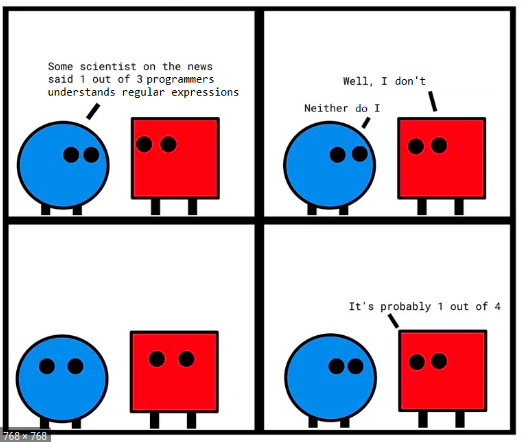

### Match method

In [1]:
import re

In [ ]:
# re.match(word, sentence)
re.match("Python", "Python is a great language")

<re.Match object; span=(0, 6), match='Python'>

In [ ]:
x = "Python is a great language"
x[0:6]

'Python'

In [ ]:
x = re.match("Python", "Pythons")
x

<re.Match object; span=(0, 6), match='Python'>

In [ ]:
x.string

'Pythons'

In [ ]:
x.span()[1]

6

In [ ]:
x.group()

'Python'

In [ ]:
re.match("Pythons", "Python")

### Using compile

In [ ]:
# [words, _, 0-9]@[words].[words]

In [ ]:
prog = re.compile("Python")
prog.match("Python is an awsome language")

<re.Match object; span=(0, 6), match='Python'>

In [ ]:
prog = re.compile("Python")
prog.match("I believe Python is an awsome language", pos=10)
# prog.match("I believe Python is an awsome language", pos=9)

In [ ]:
prog =  re.compile("ing")
words = ['String', 'Cycling', 'Ringtone']
for w in words:
  if prog.match(w, pos = len(w)-3)!=None: # 6-3 = 3
    print("{} {} has last 3 lettes 'ing'".format(w, "ok"))
  else:
    print("{} does not have last 3 letters as 'ing'".format(w))

String ok has last 3 lettes 'ing'
Cycling ok has last 3 lettes 'ing'
Ringtone does not have last 3 letters as 'ing'


### Search Method

In [ ]:
prog =  re.compile("ing")

In [ ]:
prog.search('Spring')

<re.Match object; span=(3, 6), match='ing'>

In [ ]:
prog.match('Spring')

In [ ]:
prog.match('Spring', pos=3)

<re.Match object; span=(3, 6), match='ing'>

### Findall Method

In [ ]:
prog.findall("Ringtone of Spring")

['ing', 'ing']

### Finditr

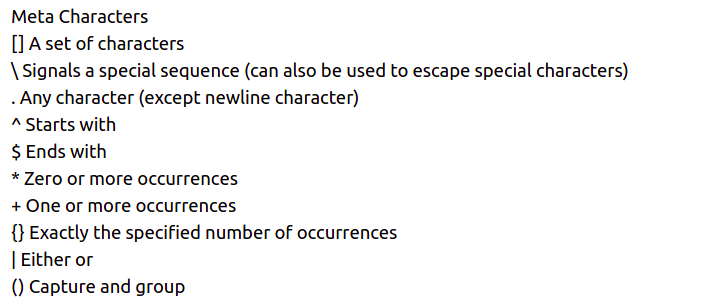

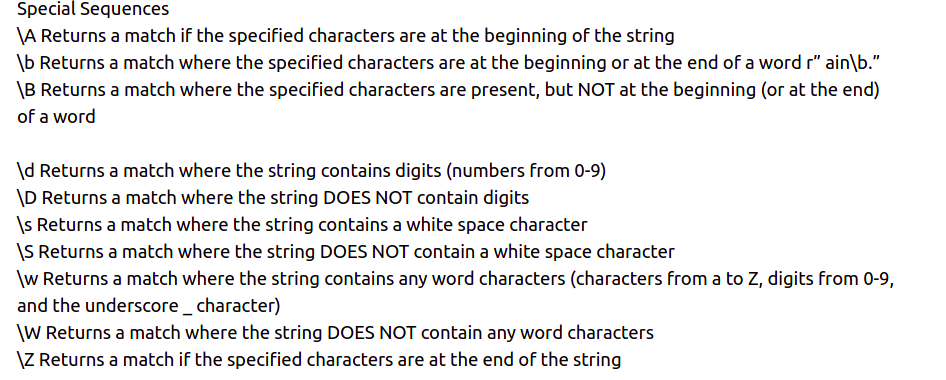

In [11]:
mystr = '''Tata Limited
Dr. David Landsman, executive director
18, Grosvenor Place
London SW1X 7HSc
Phone: +44 (20) 7235 8281
Fax: +44 (20) 7235 8727
Email: tata@tata.co.uk
Website: www.europe.tata.com
Directions: View map

Tata Sons, North America
1700 North Moore St, Suite 1520
Arlington, VA 22209-1911
USA
Phone: +1 (703) 243 9787
Fax: +1 (703) 243 9791
66-66
455-4545
Email: northamerica@tata.com 
Website: www.northamerica.tata.com
Directions: View map fass
take a new aile and move past it aiii haiaiiiiii ghai'''

In [13]:
# patt = re.compile(r'tata')
# patt = re.compile(r'.ai')
# patt = re.compile(r'^Tata')
# patt = re.compile(r'ghai$')
# patt = re.compile(r'ai*')
# patt = re.compile(r'ai+')
# patt = re.compile(r'a+i*')   # a , aaaa, ai, aiiiii, aaaiiii
# patt = re.compile(r'a?') # eaxtly 0 or 1 chgaracter
# patt = re.compile(r'ai{2}')
# patt = re.compile(r'ai{2,4}')
# patt = re.compile(r'[a,i]') # a or i or none
# patt = re.compile(r'[a-z]') # range from a to z
# patt = re.compile(r'[A-Z]')
# patt = re.compile(r'(ai){1}')
patt = re.compile(r'ai{2}|Fax')


# Special Sequences
# patt = re.compile(r'Fax\b')
# patt = re.compile(r'27\b')
# patt = re.compile(r'\d{5}-\d{4}')
# Task
# Given a string with a lot of phone numbers starting from +91

matches = patt.finditer(mystr)
for match in matches:
    print(match)


<re.Match object; span=(115, 118), match='Fax'>
<re.Match object; span=(324, 327), match='Fax'>
<re.Match object; span=(486, 489), match='aii'>
<re.Match object; span=(494, 497), match='aii'>


In [10]:
#@title What should be the Regex to read Email address?
patt = re.compile(r'[a-zA-Z0-9]+@+[a-zA-Z]+\.com')
matches = patt.finditer(mystr)
for match in matches:
    print(match)


<re.Match object; span=(369, 392), match='northamerica@@@tata.com'>


## **LECTURE 08:** *Type Conversions*

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [48]:
data['Age'] = data['Age'].fillna(23).astype('int')
data['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    23
889    26
890    32
Name: Age, Length: 891, dtype: int64

In [49]:
data.Age.dtypes

dtype('int64')

In [ ]:
data['Age'] = data['Age'].dropna().astype('float')

In [ ]:
data.Age.dtypes

dtype('float64')

In [ ]:
data['Embarked'] = data['Embarked'].astype('category')

In [ ]:
data.Embarked.dtypes

CategoricalDtype(categories=['C', 'Q', 'S'], ordered=False)

In [ ]:
data.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.679272,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.536483,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object